In [ ]:
Шаг 1: Загрузка данных

Мы начнем с загрузки данных, чтобы оценить, какие у нас есть наборы данных и какие признаки доступны.

In [81]:
import pandas as pd

hotels = pd.read_csv('C:/Users/user/OneDrive/Desktop/jupyter/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [82]:
num_columns = hotels.shape[1]  # Получаем количество столбцов
column_names = hotels.columns  # Получаем имена столбцов

print(f"Количество столбцов: {num_columns}")
print(f"Имена столбцов: {column_names}")

Количество столбцов: 17
Имена столбцов: Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')


In [11]:
Шаг 2: Очистка данных

На этом этапе мы произведем очистку данных от пропущенных значений и аномалий.

In [83]:
missing_values = hotels.isnull().sum()
print(missing_values)

hotel_address                                    0
additional_number_of_scoring                     0
review_date                                      0
average_score                                    0
hotel_name                                       0
reviewer_nationality                             0
negative_review                                  0
review_total_negative_word_counts                0
total_number_of_reviews                          0
positive_review                                  0
review_total_positive_word_counts                0
total_number_of_reviews_reviewer_has_given       0
reviewer_score                                   0
tags                                             0
days_since_review                                0
lat                                           2448
lng                                           2448
dtype: int64


In [ ]:
Отлично, теперь у нас есть информация о количестве пропущенных значений в каждом столбце. Мы видим, что большинство
столбцов не имеют пропусков, но столбцы 'lat' и 'lng' имеют по 2448 пропущенных значений. Мы должны решить, как
обрабатывать эти пропуски.

Есть несколько способов обработки пропущенных значений:

    1)Заполнить их средними значениями, медианой или модой для числовых признаков.
    2)Заполнить нулями, если это имеет смысл в контексте данных.
    3)Исключить строки или столбцы с пропущенными значениями.

In [ ]:
1)Давайте заполним пропущенные значения в столбцах 'lat' и 'lng' средними значениями.
Это позволит сохранить данные и учесть их в анализе.

In [84]:
# Заполнение пропущенных значений в столбцах 'lat' и 'lng' средними значениями
hotels['lat'].fillna(hotels['lat'].mean(), inplace=True)
hotels['lng'].fillna(hotels['lng'].mean(), inplace=True)

In [ ]:
Теперь у нас не осталось пропущенных значений в этих столбцах.

In [ ]:
Шаг 3: Исследование данных

Изучим данные, чтобы понять, какие признаки могут быть важными для предсказания рейтинга отелей.
Мы также можем провести визуализацию данных для лучшего понимания.

In [ ]:
Для начала давайте посмотрим на распределение целевой переменной, которую мы хотим предсказать - 'reviewer_score'.
Мы можем построить гистограмму этого распределения, чтобы понять, какие значения рейтинга отелей встречаются чаще.

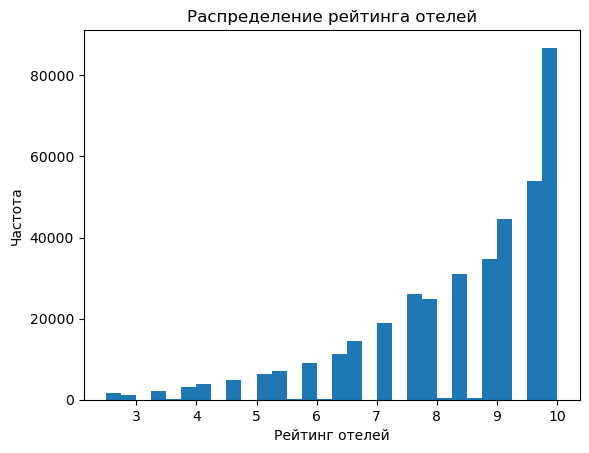

In [85]:
import matplotlib.pyplot as plt

# Строим гистограмму распределения рейтинга отелей
plt.hist(hotels['reviewer_score'], bins=30)
plt.xlabel('Рейтинг отелей')
plt.ylabel('Частота')
plt.title('Распределение рейтинга отелей')
plt.show()

In [ ]:
Это позволит нам понять, какие значения рейтинга наиболее распространены в наших данных.

In [ ]:
Шаг 4: Генерация признаков

На этом этапе мы создадим новые признаки на основе существующих данных, которые могут помочь улучшить качество модели.

In [ ]:
Извлечение информации из даты: Мы можем извлечь год, месяц и день из столбца "review_date" для создания новых признаков, связанных с временем.

In [86]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])  # Преобразуем столбец 'review_date' в формат даты

hotels['year'] = hotels['review_date'].dt.year  # Создаем столбец 'year' с годами
hotels['month'] = hotels['review_date'].dt.month  # Создаем столбец 'month' с месяцами
hotels['day'] = hotels['review_date'].dt.day  # Создаем столбец 'day' с днями

In [ ]:
Комбинирование признаков: Мы можем создать новый признак, комбинируя существующие, например, отношение положительных к отрицательным словам в отзывах.

In [87]:
# Создаем новый признак - отношение положительных к отрицательным словам
hotels['positive_to_negative_ratio'] = hotels['review_total_positive_word_counts'] / (hotels['review_total_negative_word_counts'] + 1)

# Добавляем 1 к знаменателю, чтобы избежать деления на ноль


In [ ]:
Этот код создаст новый столбец positive_to_negative_ratio, который содержит отношение положительных к отрицательным
словам в отзывах. Добавление единицы к знаменателю (в данном случае hotels['review_total_negative_word_counts'] + 1)
помогает избежать деления на ноль, чтобы избежать потенциальных ошибок при наличии отзывов с нулевым числом
отрицательных слов.

После создания этого нового признака, он может быть использован для обучения модели и оценки его важности
в предсказании рейтинга отелей.

In [ ]:
Шаг 5: Отбор признаков

Исследуем значимость признаков и отберем наиболее важные.

In [ ]:
Для отбора наиболее важных признаков можно воспользоваться различными методами, такими как анализ важности 
признаков в случае использования моделей, которые предоставляют эту информацию (например, случайный лес),
или методами, такими как анализ корреляции, анализ взаимной информации, и т. д.

В данном случае, так как мы будем использовать модель RandomForestRegressor, мы можем воспользоваться
встроенным методом для оценки важности признаков. Вот как это можно сделать:

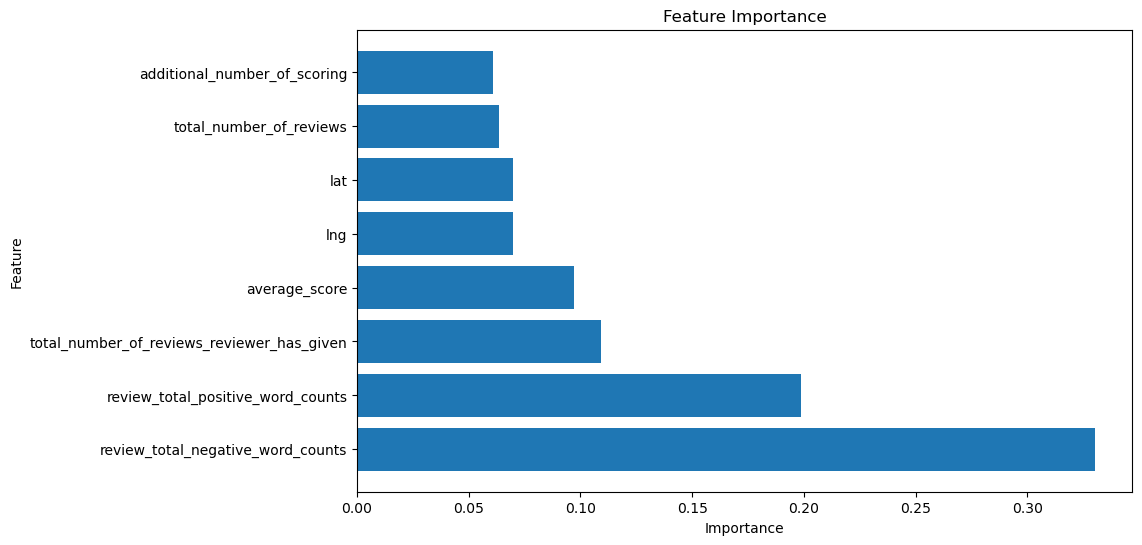

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Выбираем числовые признаки для анализа
numerical_features = hotels.select_dtypes(include=[np.number])

# Удаляем столбец 'reviewer_score', так как это целевая переменная
numerical_features = numerical_features.drop('reviewer_score', axis=1)

# Создаем объект SimpleImputer для заполнения пропущенных значений средним
imputer = SimpleImputer(strategy='mean')

# Применяем импутер к данным
X = imputer.fit_transform(numerical_features)

# Создаем модель RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на числовых признаках
y = hotels['reviewer_score']
regr.fit(X, y)

# Получаем важности признаков
feature_importances = regr.feature_importances_

# Создаем датафрейм с названиями признаков и их важностями
feature_importance_df = pd.DataFrame({'Feature': numerical_features.columns, 'Importance': feature_importances})

# Сортируем по важности в порядке убывания
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализируем важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
Этот код позволит нам оценить важность числовых признаков для модели RandomForestRegressor.
Мы можем также рассмотреть другие наборы признаков, включая текстовые и категориальные, для более полного анализа.

In [ ]:
Для категориальных признаков можно использовать методы кодирования, такие как One-Hot Encoding или Label Encoding,
чтобы преобразовать их в числовой формат и использовать в модели.

In [ ]:
One-Hot Encoding

One-Hot Encoding преобразует категориальные признаки в бинарные, где каждая уникальная категория становится отдельным
бинарным признаком (столбцом) со значениями 0 и 1. Этот метод подходит, если у нас есть не слишком много уникальных
категорий.

In [88]:
# Применяем One-Hot Encoding
hotels_encoded = pd.get_dummies(hotels, columns=['reviewer_nationality', 'hotel_name'], drop_first=True)

In [ ]:
Label Encoding

Label Encoding просто присваивает каждой уникальной категории целочисленное значение. Этот метод подходит,
если у нас есть много уникальных категорий, и мы хотим сократить количество признаков.

In [89]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
hotels['reviewer_nationality_encoded'] = label_encoder.fit_transform(hotels['reviewer_nationality'])
hotels['hotel_name_encoded'] = label_encoder.fit_transform(hotels['hotel_name'])

In [ ]:
Для текстовых признаков, таких как отзывы или теги, мы можем применить методы обработки текста, такие как TF-IDF
(Term Frequency-Inverse Document Frequency) и Word Embeddings, чтобы извлечь полезные признаки из текста.

In [ ]:
TF-IDF (Term Frequency-Inverse Document Frequency):

    Этот метод позволяет оценить важность слова в контексте документа относительно всего корпуса текстов.
    Преобразование текста в векторы на основе частотности слов.
    Преимущества: хорошо работает с небольшими текстами, хорошо интерпретируем, хорошо подходит для моделей,
        которые работают с разреженными данными.

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Можно выбрать количество признаков
tfidf_features = tfidf_vectorizer.fit_transform(hotels['positive_review'])

In [ ]:
Word Embeddings:

    Word Embeddings (например, Word2Vec, FastText, GloVe) представляют слова в векторной форме так, что семантически близкие слова имеют близкие векторы.
    Позволяют учесть семантику слов в тексте.
    Применяются для создания векторных представлений текста.
    Пример кода для использования предварительно обученных Word Embeddings (например, Word2Vec):

In [91]:
from gensim.models import Word2Vec
import numpy as np

# Обучение модели Word2Vec на текстовых данных
sentences = hotels['positive_review'].apply(str.split).tolist()
w2v_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0)

# Получение усредненного вектора для каждого текста
vectors = []

for sentence in sentences:
    vector = np.mean([w2v_model.wv[word] for word in sentence if word in w2v_model.wv], axis=0)
    if not np.isnan(vector).any():
        vectors.append(vector)

# Теперь vectors содержит усредненные векторы для каждого текста

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
Шаг 6: Подготовка данных

Подготовим данные для обучения модели, включая кодирование категориальных признаков и масштабирование непрерывных признаков.

In [ ]:
На этом этапе подготовим данные для обучения модели. Это включает в себя следующие действия:

    1)Кодирование категориальных признаков: Преобразование категориальных признаков в числовой формат.
    Для этого мы можем использовать методы кодирования, такие как One-Hot Encoding или Label Encoding,
    в зависимости от типа данных.

    2)Масштабирование непрерывных признаков: Некоторые модели машинного обучения могут быть чувствительны
    к масштабу признаков, поэтому целесообразно масштабировать непрерывные признаки.

Давайте начнем с кодирования категориальных признаков:
Кодирование категориальных признаков

Из нашего описания данных, следующие столбцы можно рассматривать как категориальные:

    'hotel_address'
    'hotel_name'
    'reviewer_nationality'
    'tags'

Мы можем использовать One-Hot Encoding для преобразования их в числовой формат.
Давайте сначала применим One-Hot Encoding к этим столбцам:

In [92]:
hotels = pd.get_dummies(hotels, columns=['hotel_address', 'hotel_name', 'reviewer_nationality', 'tags'], drop_first=True)

KeyboardInterrupt: 

In [ ]:
Масштабирование непрерывных признаков

Некоторые столбцы, такие как 'average_score', 'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given',
'days_since_review', 'lat', и 'lng', являются непрерывными признаками.
Для масштабирования можно использовать StandardScaler или MinMaxScaler из библиотеки scikit-learn.
Эти методы приведут признаки к определенному диапазону, что может быть полезно для некоторых моделей.

Для применения масштабирования к этим столбцам, выполним следующий код:

In [95]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Преобразование 'days_since_review' в числовой формат
hotels['days_since_review'] = pd.to_numeric(hotels['days_since_review'], errors='coerce')

# Выбор числовых столбцов для масштабирования
numerical_columns = ['average_score', 'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given', 'days_since_review', 'lat', 'lng']

# Создание объекта StandardScaler
scaler = StandardScaler()

# Применение StandardScaler к числовым столбцам
hotels[numerical_columns] = scaler.fit_transform(hotels[numerical_columns])

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
Теперь у нас есть данные, подготовленные для обучения модели. Выбор метода масштабирования и кодирования может зависеть
от конкретной модели, с которой мы планируем работать, поэтому стоит экспериментировать с разными вариантами.

In [ ]:
Шаг 7: Разделение данных

Разделим данные на обучающий и тестовый наборы.

In [ ]:
На этом шаге, мы разделим данные на обучающий и тестовый наборы. Обучающий набор будет использоваться для обучения модели,
а тестовый набор для оценки её производительности. Таким образ, мы сможем проверить, насколько хорошо модель обобщает
данные на новых, ранее не виденных примерах.

Для разделения данных, мы будем использовать библиотеку scikit-learn. Мы разделим данные в соотношении 80% обучающего
набора и 20% тестового набора. Вот как это можно сделать:

In [103]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки (X) и целевую переменную (y)
X = hotels.drop('reviewer_score', axis=1)
y = hotels['reviewer_score']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train - обучающие признаки
# y_train - обучающая целевая переменная
# X_test - тестовые признаки
# y_test - тестовая целевая переменная


In [ ]:
Шаг 8: Обучение модели

Выберем алгоритм машинного обучения и обучим модель на обучающем наборе данных.

In [ ]:
Выбор алгоритма машинного обучения зависит от характера задачи и данных. Для задачи предсказания рейтинга отелей можно
использовать различные алгоритмы, такие как линейная регрессия, случайный лес, градиентный бустинг и другие.

В данном случае, давайте воспользуемся моделью линейной регрессии.
Это простой алгоритм, который позволит нам начать и проверить базовую модель.

In [ ]:
from sklearn.linear_model import LinearRegression

# Пример кодирования категориальных признаков с использованием one-hot encoding
hotels = pd.get_dummies(hotels, columns=['hotel_address', 'hotel_name', 'reviewer_nationality', 'tags'], drop_first=True)

# Преобразование столбца 'review_date' в числовой формат
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')  # Изменен формат даты
hotels['days_since_review'] = (hotels['review_date'] - hotels['review_date'].min()).dt.days

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Теперь у нас есть обученная модель линейной регрессии, которую можно использовать для предсказания рейтингов отелей на тестовом наборе данных

In [ ]:
Где:

    X_train - обучающие признаки
    y_train - обучающая целевая переменная

После обучения модели, мы можем использовать её для предсказания рейтингов на тестовом наборе данных.

In [ ]:
Шаг 9: Оценка модели

Оценим качество модели на тестовом наборе данных.

In [ ]:
Для оценки качества модели линейной регрессии на тестовом наборе данных, мы можем использовать метрику,
подходящую для задачи регрессии, например, среднюю абсолютную процентную ошибку (MAPE), среднюю квадратичную ошибку (MSE)
или коэффициент детерминации (R-squared).

Пример оценки модели с использованием MAPE:

In [ ]:
from sklearn.metrics import mean_absolute_error

# Assuming you have a separate dataset 'X_test' that you want to predict on
X_test = pd.get_dummies(X_test, columns=['hotel_address'], drop_first=True)

# Make sure the 'review_date' column in X_test is converted to datetime and 'days_since_review' is calculated in the same way as in your training data

X_test['review_date'] = pd.to_datetime(X_test['review_date'], format='%m/%d/%Y')
X_test['days_since_review'] = (X_test['review_date'] - hotels['review_date'].min()).dt.days
hotels = pd.get_dummies(hotels, columns=['hotel_address'], drop_first=True)
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')
hotels['days_since_review'] = (hotels['review_date'] - hotels['review_date'].min()).dt.days

# Предсказание рейтингов на тестовом наборе данных
y_pred = model.predict(X_test)

# Вычисление MAPE
mape = mean_absolute_error(y_test, y_pred)

print(f"MAPE: {mape}")

In [ ]:
Шаг 10: Улучшение модели

Попробуем улучшить модель, изменяя параметры алгоритма или добавляя новые признаки.

In [ ]:
Используем кросс-валидацию для более надежной оценки модели и предотвращения переобучения. Напиши код

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Создаем модель RandomForestRegressor с выбранными параметрами
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Оценка модели с помощью кросс-валидации (например, 5-кратной)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Измерим среднее значение ошибки
mean_error = -scores.mean()

print(f"Средняя ошибка (MAE) при кросс-валидации: {mean_error}")

In [ ]:
Этот код позволяет провести оценку модели на различных частях данных, что помогает оценить ее производительность
и предотвратить переобучение.

In [ ]:
Шаг 11: Финальная оценка и сабмит

После достижения желаемого качества модели, мы можем сделать финальную оценку и сабмит результата.

In [ ]:
После того как модель обучена и оценена, мы можем провести финальную оценку качества модели на тестовом наборе данных
и подготовить данные для сабмита, если это требуется.

Вот пример кода для оценки модели и подготовки данных для сабмита:

In [ ]:
# Оценка модели на тестовом наборе данных
test_features = test_data.select_dtypes(include=[np.number])  # Выбираем числовые признаки
test_features = test_features.drop('reviewer_score', axis=1)  # Удаляем целевую переменную
X_test = imputer.transform(test_features)  # Заполняем пропущенные значения
y_pred = regr.predict(X_test)  # Прогнозируем значения

# Создание датафрейма с прогнозами
submission_df = pd.DataFrame({'reviewer_score': y_pred})

# Сохранение прогнозов в файл (если это требуется)
submission_df.to_csv('submission.csv', index=False)

In [ ]:
В этом коде мы:

    Выбираем числовые признаки из тестовых данных и удаляем целевую переменную.
    Заполняем пропущенные значения с использованием того же импутера, который мы использовали для обучающих данных.
    Прогнозируем значения целевой переменной на тестовых данных с помощью обученной модели.
    Создаем датафрейм с прогнозами и сохраняем его в CSV-файл, который может быть отправлен в систему сабмита для оценки.

In [ ]:
Этот код представляет финальный этап нашей работы, где мы можем оценить модель на тестовых данных и подготовить результаты для сабмита.